## **PSI3431 - Processamento Estatístico de Sinais (2022)**
### Exercício Computacional 2 - Projeto de Filtros Digitais


**Aluno:** Ivan Luiz de Moura Matos

**N°USP:** 11234162

**Data de entrega:** 13/05/2022

In [1]:
using PyPlot, DSP

## Resolução do item 1)

### **Item 1-a)** 

Vamos utilizar o **método dos mínimos quadrados** para projetar um filtro com $N = 101$ coeficientes que aproxime a resposta ideal

$$
H_d(e^{j\omega}) = 
     \begin{cases}
       1 \, ,&\;\textrm{se}\quad|\omega| < \pi/4 \\
       0 \, ,&\;\textrm{se}\quad \pi/4 \leq|\omega| \leq \pi \\ 
     \end{cases}
$$

Inicialmente, vamos determinar a resposta ao impulso, $h_d[n]$, do filtro desejado. 

Para $n \neq 0$, temos, antitransformando a expressão acima:

$$h_d[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\omega}) \cdot e^{j\omega n} \,d\omega
= \frac{1}{2\pi} \int_{-\pi/4}^{\pi/4} (1) \cdot e^{j\omega n} \,d\omega
= \frac{1}{2\pi} \int_{-\pi/4}^{\pi/4} e^{j\omega n} \,d\omega
$$

$$
= \frac{1}{2\pi} \Big[\frac{1}{j\,n} e^{j\omega n} \Big]_{-\pi/4}^{\pi/4}
= \frac{1}{\pi\,n} \frac{1}{2j} \Big[e^{j\,n\,\pi/4} - e^{-j\,n\,\pi/4} \Big]
$$

Como $sin(x) = \frac{e^{j\, x} - e^{-j\,x}}{2\,j}$, resulta, para $n \neq 0$:

$$h_d[n] = \frac{1}{\pi\,n} \cdot \sin(\frac{\pi}{4}\,n)$$

Para $n = 0$, temos:

$$h_d[0] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\,\omega}) \cdot e^{j\omega 0} \,d\omega
= \frac{1}{2\pi} \int_{-\pi/4}^{\pi/4} (1) \cdot (1) \,d\omega
= \frac{1}{2\pi} \cdot (\pi/4 - (-\pi/4)) = 1/4
$$

Finalmente, uma vez que 

$$\frac{1}{\pi\,n} \cdot \sin(\frac{\pi}{4}\,n) = \frac{1/4}{\frac{\pi}{4}\,n} \cdot \sin(\frac{\pi}{4}\,n) = \frac{1}{4}\textrm{sinc}\Big(\frac{1}{4}n\Big)$$

onde

$$
\textrm{sinc}(x) = 
     \begin{cases}
       \frac{\sin(\pi x)}{\pi x} \, ,&\;\textrm{se}\quad x \neq 0 \\
       1 \, ,&\;\textrm{se}\quad x = 0 \\ 
     \end{cases}
$$

podemos escrever:

$$
h_d[n] = \frac{1}{4}\textrm{sinc}\Big(\frac{1}{4}n\Big) 
$$


Vemos que a resposta $h_d[n]$ é simétrica ao redor de $n=0$. Podemos considerar um atraso $L = (N-1)/2 = (101-1)/2=50$, além de efetuar o truncamento para $N=101$ coeficientes. Obtemos, assim, a seguinte resposta ao impulso:

$$
h[n] = 
     \begin{cases}
       \frac{1}{4}\textrm{sinc}\Big(\frac{1}{4}(n-50)\Big) \, ,&\;\textrm{se}\quad 0 \leq n \leq 100\\
       0 \, ,&\;\textrm{se}\quad n < 0 \; \textrm{ou} \; n > 100 \\ 
     \end{cases}
$$

Vamos agora criar a sequência ``ha[n]`` constituída pelos 101 coeficientes de $h[n]$. A letra ``a`` denota apenas que este é o filtro implementado no item 1-a).

**Observação:** devemos lembrar que os índices dos vetores na linguagem Julia iniciam-se em 1, e não em 0. Por conta disso, a sequência ``ha`` tem valores ``ha[1]``, ``ha[2]``,...,``ha[101]``, e seu elemento central é ``ha[51]``. No entanto, vamos considerar que ``ha[1]`` armazena o valor de $h[0]$,  ``ha[2]`` armazena o valor de $h[1]$, e assim por diante. Tal convenção será utilizada ao longo deste relatório para todos os vetores que representam algum sinal.

In [2]:
N = 101;
ha = zeros(N);

ha[1:50] = 1/4 * sin.(pi * 1/4 * ((1:50) .- 51))./(pi * 1/4 * ((1:50) .- 51));
ha[51] = 1/4;
ha[52:101] = 1/4 * sin.(pi * 1/4 * ((52:101) .- 51))./(pi * 1/4 * ((52:101) .- 51));

# Observação: para construir essa sequência (ha), poderia ter sido 
# usada a função sinc, que já existe na linguagem.

Abaixo, é plotada a resposta ao impulso, $h[n]$ :

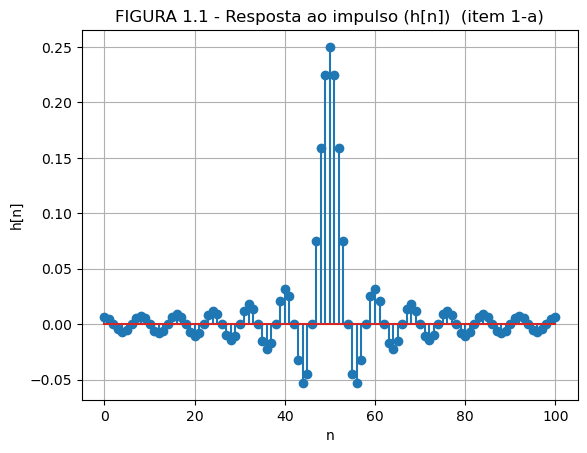

In [3]:
stem(0:100,ha);
title("FIGURA 1.1 - Resposta ao impulso (h[n])  (item 1-a)");
ylabel("h[n]"); xlabel("n"); grid();

Em seguida, criamos a variável ``ha_filtro`` do tipo ``filter``, e calculamos a resposta em frequência ``Ha_filtro``:

In [4]:
ha_filtro = PolynomialRatio(ha,[1.0]);

omega_filtro_a= range(0, stop=pi, length = 500);
Ha_filtro = freqz(ha_filtro, omega_filtro_a);

Abaixo, é apresentado o **módulo da resposta em frequência** do filtro:

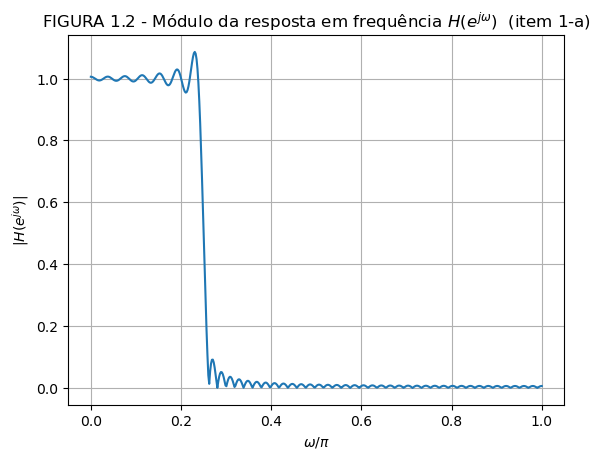

In [5]:
plot(omega_filtro_a/pi, abs.(Ha_filtro));
title(L"FIGURA 1.2 - Módulo da resposta em frequência $H(e^{j\omega})$  (item 1-a)");
ylabel(L"|H(e^{j\omega})|"); xlabel(L"\omega/\pi"); grid();

Notamos que o a resposta em frequência do filtro $H(e^{j\,\omega})$ de fato aproxima um **passa-baixas** ideal de frequência de corte $\omega_c = \pi/4$.

### **Item 1-b)**

Agora, procedendo de forma similar, vamos utilizar o método dos mínimos quadrados para projetar um filtro com $N = 101$ coeficientes que aproxime a resposta ideal

$$
H_d(e^{j\omega}) = 
     \begin{cases}
       0 \, ,&\;\textrm{se}\quad|\omega| < \pi/4 \\
       1 \, ,&\;\textrm{se}\quad \pi/4 \leq|\omega| \leq \pi \\ 
     \end{cases}
$$

Determinemos, inicialmente, a resposta ao impulso, $h_d[n]$, do filtro desejado. 

Para $n \neq 0$, temos, antitransformando a expressão acima:

$$h_d[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\omega}) \cdot e^{j\omega n} \,d\omega
= \frac{1}{2\pi} \int_{-\pi}^{-\pi/4} (1) \cdot e^{j\omega n} \,d\omega + \frac{1}{2\pi} \int_{\pi/4}^{\pi} (1) \cdot e^{j\omega n} \,d\omega
$$

$$
= \frac{1}{2\pi} \Big[\frac{1}{j\,n} e^{j\omega n} \Big]_{-\pi}^{-\pi/4} +
\frac{1}{2\pi} \Big[\frac{1}{j\,n} e^{j\omega n} \Big]_{\pi/4}^{\pi}
= \frac{1}{\pi\,n} \, \frac{1}{2j} \Big[ e^{-j\,n\,\pi/4} - e^{-j\,n\,\pi} + e^{j\,n\,\pi} - e^{j\,n\,\pi/4} \Big]
$$
$$
= \frac{1}{\pi\,n} \, \Big[ \sin(\pi\,n) - \sin(\frac{\pi}{4}\,n) \Big]
= \frac{1}{\pi\,n} \cdot \Big(- \sin(\frac{\pi}{4}\,n)\Big)
$$

Por outro lado, para $n = 0$, temos:

$$h_d[0] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\,\omega}) \cdot e^{j\omega 0} \,d\omega
= \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\,\omega}) \cdot (1) \,d\omega
$$
$$
= \frac{1}{2\pi} \int_{-\pi}^{-\pi/4} (1) \cdot (1) \,d\omega + \frac{1}{2\pi} \int_{\pi/4}^{\pi} (1) \cdot (1) \,d\omega
= \frac{1}{2\pi} \cdot (3\pi/4 + 3\pi/4) = 3/4
$$

Finalmente, combinando os resultados obtidos para $n \neq 0$ e $n = 0$, podemos escrever (para todo $n$)

$$
h_d[n] = \delta[n] -\frac{1}{4}\textrm{sinc}\Big(\frac{1}{4}n\Big)
$$

onde 

$$
\delta[n] = 
     \begin{cases}
     1 \, ,&\;\textrm{se}\quad n =0 \\
       0 \, ,&\;\textrm{se}\quad n \neq 0\\ 
     \end{cases}
$$

Como no caso anterior, vamos considerar um atraso $L = (N-1)/2 = (101-1)/2=50$, além de efetuar o truncamento para $N=101$ coeficientes. Obtemos, portanto, a seguinte aproximação para a resposta ao impulso desejada:

$$
h[n] = 
     \begin{cases}
     \delta[n-50]-\frac{1}{4}\textrm{sinc}\Big(\frac{1}{4}(n-50)\Big) \, ,&\;\textrm{se}\quad 0 \leq n \leq 100\\
       0 \, ,&\;\textrm{se}\quad n < 0 \; \textrm{ou} \; n > 100 \\ 
     \end{cases}
$$

Vamos agora criar a sequência ``hb[n]`` constituída pelos 101 coeficientes de $h[n]$.

In [6]:
N = 101;
hb = zeros(N);

hb[1:50] = -1/4 * sin.(pi * 1/4 * ((1:50) .- 51))./(pi * 1/4 * ((1:50) .- 51));
hb[51] = 1 - 1/4;
hb[52:101] = -1/4 * sin.(pi * 1/4 * ((52:101) .- 51))./(pi * 1/4 * ((52:101) .- 51));

Abaixo, é plotada a resposta ao impulso, $h[n]$ :

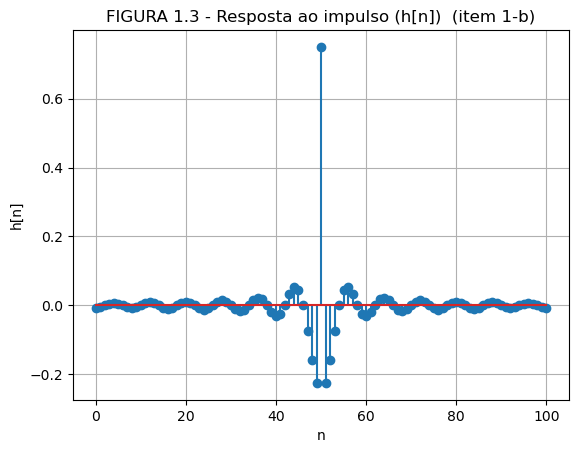

In [7]:
stem(0:100,hb);
title("FIGURA 1.3 - Resposta ao impulso (h[n])  (item 1-b)");
ylabel("h[n]"); xlabel("n"); grid();

Em seguida, criamos a variável ``hb_filtro`` do tipo ``filter``, e calculamos a resposta em frequência ``Hb_filtro``:

In [8]:
hb_filtro = PolynomialRatio(hb,[1.0]);

omega_filtro_b= range(0, stop=pi, length = 500);
Hb_filtro = freqz(hb_filtro, omega_filtro_b);

Abaixo, é apresentada a **resposta em frequência** do filtro:

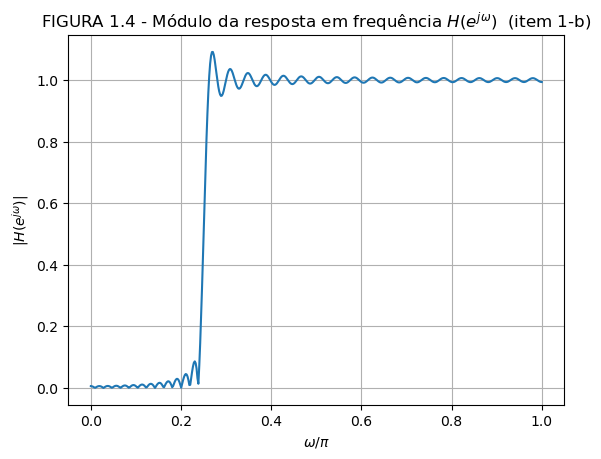

In [9]:
plot(omega_filtro_b/pi, abs.(Hb_filtro));
title(L"FIGURA 1.4 - Módulo da resposta em frequência $H(e^{j\omega})$  (item 1-b)");
ylabel(L"|H(e^{j\omega})|"); xlabel(L"\omega/\pi"); grid();

Notamos que o a resposta em frequência do filtro $H(e^{j\,\omega})$ de fato aproxima um **passa-altas** ideal de frequência de corte $\omega_c = \pi/4$.

## Resolução do item 2)

Vamos escrever uma função ``filtroFIR`` que implemente o filtro dado pela seguinte equação:

$$y[n] = h[0]\,x[n] \; + \; h[1]\,x[n-1] \; + \; ... \; + \; h[N-1]\,x[n-N+1]$$

Os parâmetros de entrada serão ``h`` (sequência que representa a resposta ao impulso do filtro), e ``x`` (sequência que representa o sinal de entrada). A saída é ``y`` (sequência que representa o sinal de saída do filtro).

In [10]:
function filtroFIR(h, x)
        
    K = length(x);
    y = zeros(K);
        
    # Laços aninhados para cálculo da convolução 
    # entre x[n] e h[n], no trecho de interesse
    for n in 1:K
        for i in 1:n
            if (n-i+1 <= length(h))
                y[n] = y[n] + x[i]*h[n-i+1];
            end
        end
    end
    
    return(y)

end;

# Na funcao acima, o teste condicional (if) é utilizado para que
# não haja tentativa de acesso a indices fora do comprimento de h, 
# e para que elementos fora do comprimento de h sejam considerados
# nulos nos cálculos.

## Resolução do item 3)

Vamos considerar o sinal de entrada dado por

$$
x[n] = \cos(\pi\,n\,/\,20) + \cos(\pi\,n\,/\,3)
$$

Vale observar que o sinal $x[n]$ é composto por duas componentes cossenoidais, uma de menor frequência ($\cos(\pi\,n\,/\,20)$) e outra de maior frequência ($\cos(\pi\,n\,/\,3)$). Ambas as componentes têm amplitude unitária.

In [11]:
# Sequencia com valores n=0,1,2,...,200, nos quais 
# sera calculada a funcao x[n]
seq = 0:200;

# Construção da sequencia que representa o sinal de entrada x[n]
x = cos.(pi*seq/20) + cos.(pi*seq/3);

Abaixo, plotamos o gráfico do sinal $x[n]$, para $0 \leq n \leq 200$ :

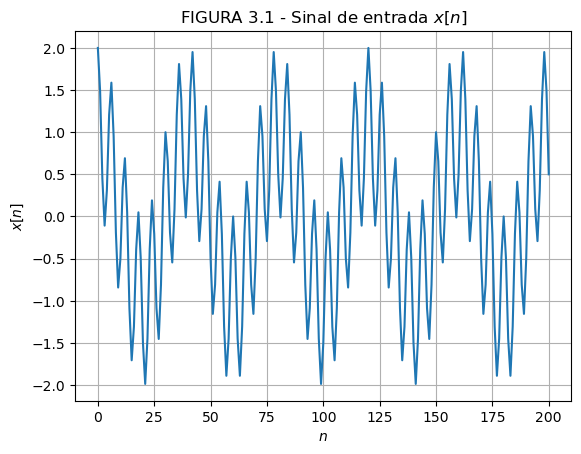

In [12]:
plot(x);
title(L"FIGURA 3.1 - Sinal de entrada $x[n]$");
ylabel(L"x[n]"); xlabel(L"n"); grid();

### **Item 3-a)** 

Vamos utilizar a função ``filtroFIR`` para obter a saída do filtros calculados nos itens **1-a)** e **1-b)**, quando a entrada é o sinal $x[n]$.

Vamos comparar os resultados da função ``filtroFIR`` com aqueles obtidos pelo uso da função ``filt``, implementada no pacote ``DSP`` da linguagem Julia.

### Comparação entre saídas do programa ``filtroFIR`` e da função ``filt``, no caso do filtro passa-baixas implementado no item 1-a)

Inicialmente, vamos considerar o filtro proposto no item **1-a)**, com resposta ideal

$$
H_d(e^{j\omega}) = 
     \begin{cases}
       1 \, ,&\;\textrm{se}\quad|\omega| < \pi/4 \\
       0 \, ,&\;\textrm{se}\quad \pi/4 \leq|\omega| \leq \pi \\ 
     \end{cases}
$$

Lembremos que ``ha`` representa os coeficientes do filtro aproximado $h[n]$ obtido no **item 1-a)**.

**Com o uso da função ``filtroFIR``**, obtemos a seguinte resposta, plotada no gráfico abaixo:

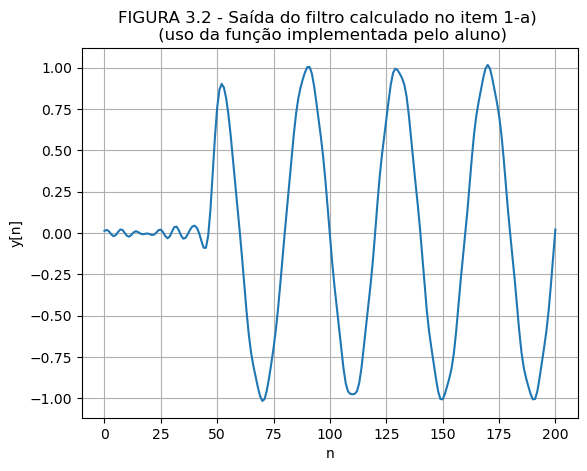

In [13]:
plot(seq, filtroFIR(ha, x));

title("FIGURA 3.2 - Saída do filtro calculado no item 1-a) \n (uso da função implementada pelo aluno)");
ylabel("y[n]"); xlabel("n"); grid();

Por outro lado, **com o uso da função ``filt`` da linguagem Julia**, obtemos a seguinte resposta, plotada no gráfico abaixo:

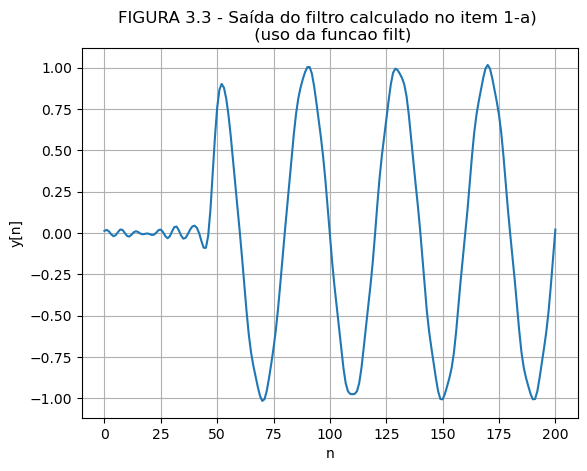

In [14]:
plot(seq, filt(ha,x));
title("FIGURA 3.3 - Saída do filtro calculado no item 1-a) \n (uso da funcao filt)");
ylabel("y[n]"); xlabel("n"); grid();

(*Observação: Pode-se observar que, em ambos os casos, a saída do filtro apresenta um transitório no início da filtragem.*)

Podemos notar que, visualmente, a saída obtida com a função ``filtroFIR``implementada é compatível com a saída obtida pela função ``filt`` da linguagem Julia. De fato, podemos calcular a diferença entre tais saídas, ponto a ponto, para perceber que tal diferença é de fato muito pequena (da ordem de $10^{-16}$ a $10^{-15}$):

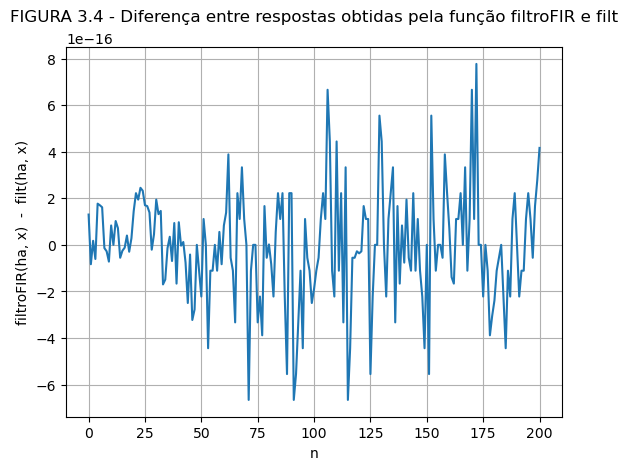

In [15]:
plot(seq, filtroFIR(ha,x)-filt(ha,x));
title("FIGURA 3.4 - Diferença entre respostas obtidas pela função filtroFIR e filt\n");
ylabel("filtroFIR(ha, x)  -  filt(ha, x)"); xlabel("n"); grid();

### Comparação entre saídas do programa ``filtroFIR`` e da função ``filt``, no caso do filtro passa-altas implementado no item 1-b)

Agora, vamos considerar o filtro proposto no item **1-b)**, com resposta ideal

$$
H_d(e^{j\omega}) = 
     \begin{cases}
       0 \, ,&\;\textrm{se}\quad|\omega| < \pi/4 \\
       1 \, ,&\;\textrm{se}\quad \pi/4 \leq|\omega| \leq \pi \\ 
     \end{cases}
$$

Lembremos que ``hb`` representa os coeficientes do filtro aproximado $h[n]$ obtido no **item 1-b)**.

**Com o uso da função ``filtroFIR``**, obtemos a seguinte resposta, plotada no gráfico abaixo:

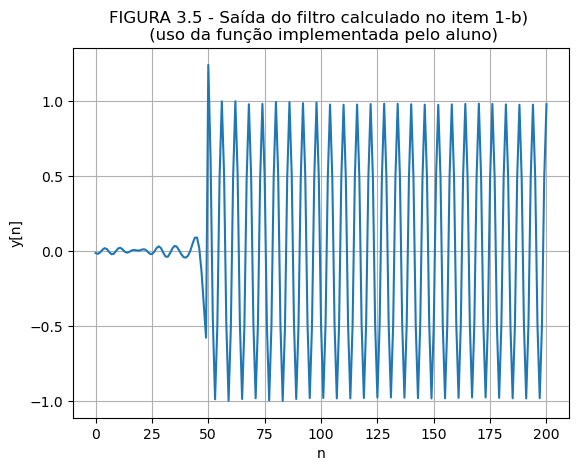

In [16]:
plot(seq, filtroFIR(hb, x));

title("FIGURA 3.5 - Saída do filtro calculado no item 1-b) \n (uso da função implementada pelo aluno)");
ylabel("y[n]"); xlabel("n"); grid();

Por outro lado, **com o uso da função ``filt`` da linguagem Julia**, obtemos a seguinte resposta, plotada no gráfico abaixo:

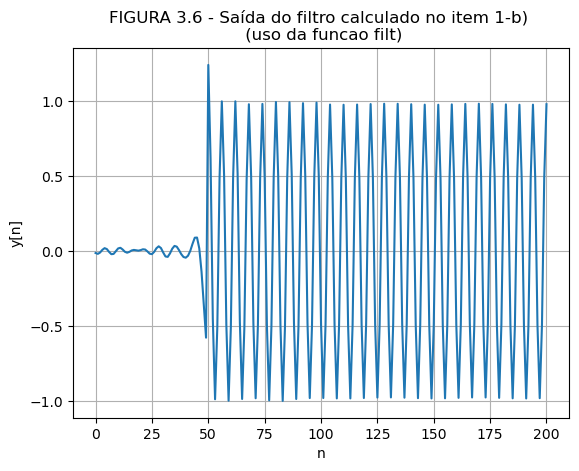

In [17]:
plot(seq, filt(hb,x));
title("FIGURA 3.6 - Saída do filtro calculado no item 1-b) \n (uso da funcao filt)");
ylabel("y[n]"); xlabel("n"); grid();

(*Observação: Pode-se observar que, em ambos os casos, a saída do filtro apresenta um transitório no início da filtragem.*)

Novamente, notamos que a saída obtida com a função ``filtroFIR``implementada é (visualmente) igual à saída obtida pela função ``filt`` da linguagem Julia. De fato, calculemos a diferença entre tais saídas para perceber que tal diferença é de fato muito pequena (da ordem de $10^{-15}$):

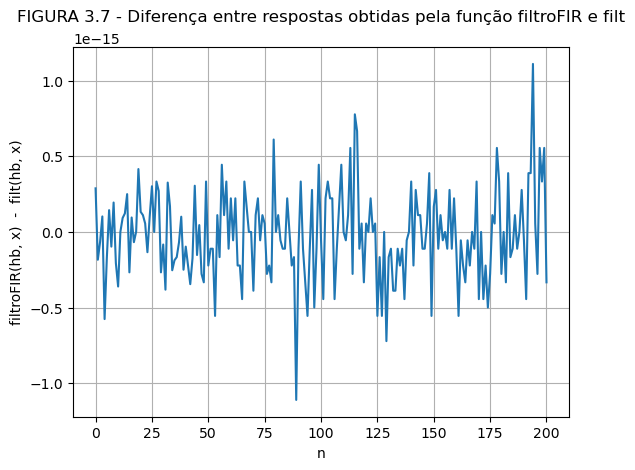

In [18]:
plot(seq, filtroFIR(hb,x)-filt(hb,x));
title("FIGURA 3.7 - Diferença entre respostas obtidas pela função filtroFIR e filt\n");
ylabel("filtroFIR(hb, x)  -  filt(hb, x)"); xlabel("n"); grid();

### **Item 3-b)**

### Resposta em frequência do filtro passa-baixas implementado no item 1-a), e análise da saída do filtro para entrada $x[n]$

Abaixo, apresentamos a resposta em frequência (módulo e fase) do filtro passa-baixas implementado no **item 1-a)**:

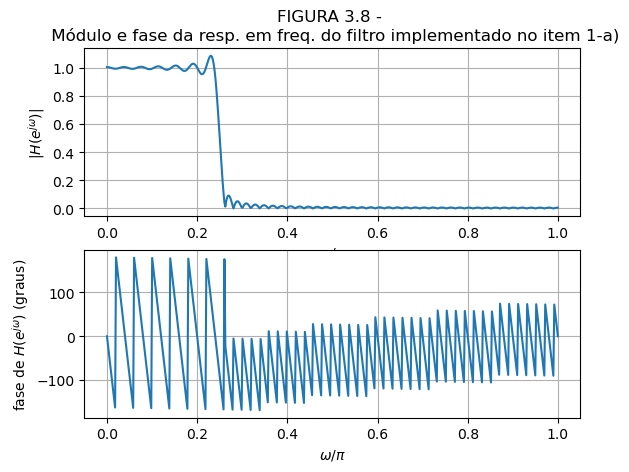

In [19]:
subplot(211);
plot(omega_filtro_a/pi,abs.(Ha_filtro));
title("FIGURA 3.8 - \n Módulo e fase da resp. em freq. do filtro implementado no item 1-a)");
grid();
ylabel(L"$|H(e^{j\omega})|$");
xlabel(L"$\omega/\pi$");
subplot(212);
plot(omega_filtro_a/pi,angle.(Ha_filtro)*180/pi);
grid();
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H(e^{j\omega})$ (graus)");

Quando a entrada é $x[n]$, e passado o transitório, o sinal de saída do filtro implementado no **item 1-a)** aproxima-se de uma senoide e tem amplitude (aproximadamente) igual a 1.
De fato, podemos verificar que o módulo da resposta em frequência desse filtro, calculada em $\omega = \pi/20$ é aproximadamente igual a 1, como mostrado logo acima (Figura 3.8).

A partir dos resultados do **item 3-a)** (Figura 3.2), notamos que o filtro calculado no item **1-a**, quando se aplica o sinal $x[n] = \cos(\pi\,n\,/\,20) + \cos(\pi\,n\,/\,3)$ em sua entrada, tem o efeito de "eliminar" (filtrar) a componente referente ao cosseno de maior frequência ($\cos(\pi\,n\,/\,3)$), e manter a componente de menor frequência ($cos(\pi\,n\,/\,20)$) praticamente inalterada. Tal comportamento é condizente com um filtro passa-baixas com frequência de corte $\omega_c = \pi/4$.

Abaixo, plotamos o gráfico da componente de menor frequência $x_1[n] = \cos(\pi\,n\,/\,20)$, para percebermos que, de fato, ela corresponde ao sinal de saída (após o transitório) do filtro passa-baixas implementado no item 1-a) e mostrado na Figura 3.2.

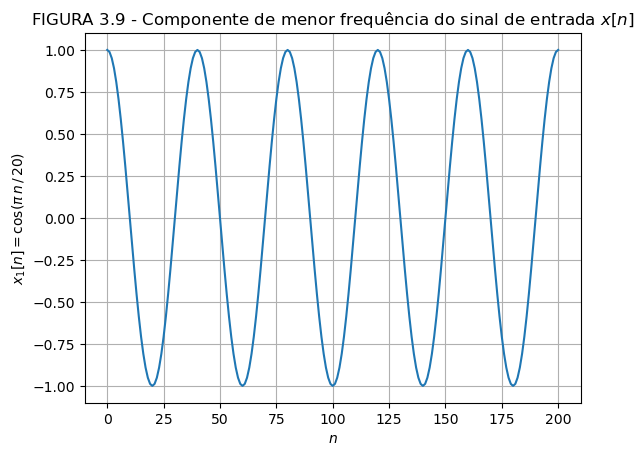

In [20]:
plot(seq, cos.(pi*seq/20));
title(L"FIGURA 3.9 - Componente de menor frequência do sinal de entrada $x[n]$");
ylabel(L"$x_1[n]=\cos(\pi\,n\,/\,20)$"); xlabel(L"$n$"); grid();

### Resposta em frequência do filtro passa-altas implementado no item 1-b), e análise da saída do filtro para entrada $x[n]$


Abaixo, apresentamos a resposta em frequência (módulo e fase) do filtro passa-altas implementado no **item 1-b)**:

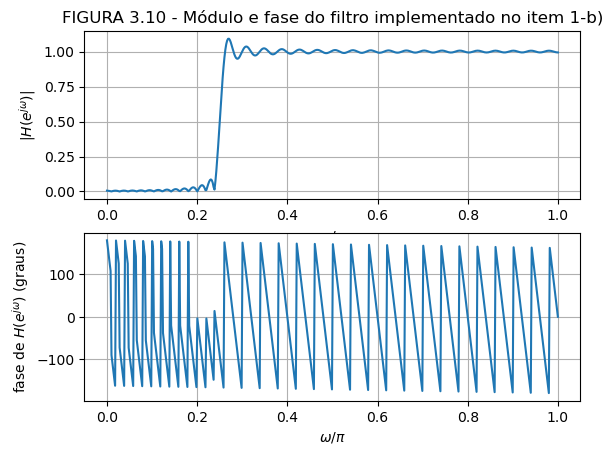

In [21]:
subplot(211)
plot(omega_filtro_b/pi,abs.(Hb_filtro))
title("FIGURA 3.10 - Módulo e fase do filtro implementado no item 1-b)")
grid()
ylabel(L"$|H(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_b/pi,angle.(Hb_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H(e^{j\omega})$ (graus)");

Quando a entrada é $x[n]$, e passado o transitório, o sinal de saída do filtro implementado no **item 1-b)** aproxima-se de uma senoide e tem amplitude (aproximadamente) igual a 1.
De fato, podemos verificar que o módulo da resposta em frequência desse filtro, calculada em $\omega = \pi/3$ é aproximadamente igual a 1, como mostrado logo acima (Figura 3.10).

Além disso, a partir dos resultados do **item 3-a)**, notamos que o filtro calculado no item **1-b**, quando se aplica o sinal $x[n] = \cos(\pi\,n\,/\,20) + \cos(\pi\,n\,/\,3)$ em sua entrada, tem o efeito de "eliminar" (filtrar) a componente referente ao cosseno de menor frequência ($\cos(\pi\,n\,/\,20)$), ao passo que a componente de maior frequência ($\cos(\pi\,n\,/\,3)$) é mantida praticamente inalterada. Tal comportamento é condizente com um filtro passa-altas com frequência de corte $\omega_c = \pi/4$.

Abaixo, plotamos o gráfico da componente de maior frequência $x_2[n] = \cos(\pi\,n\,/\,3)$, para percebermos que, de fato, ela corresponde ao sinal de saída (após o transitório) do filtro passa-altas implementado no item 1-b), e mostrado na Figura 3.5.

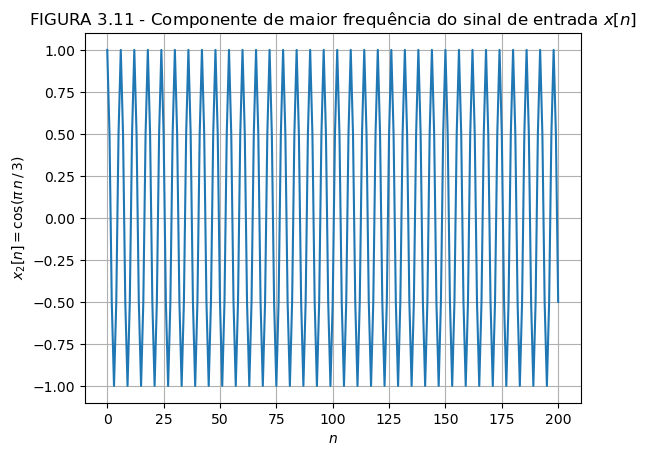

In [22]:
plot(seq, cos.(pi*seq/3));
title(L"FIGURA 3.11 - Componente de maior frequência do sinal de entrada $x[n]$");
ylabel(L"$x_2[n]=\cos(\pi\,n\,/\,3)$"); xlabel(L"$n$"); grid();

## Resolução do item 4)

Desejamos, agora, projetar um filtro passa-baixas $H_1(e^{j\omega})$ e um filtro passa-altas $H_2(e^{j\omega})$, para separar os dois cossenos do sinal $x[n] = \cos(\pi\,n\,/\,20) + \cos(\pi\,n\,/\,3)$. Propõe-se que os filtros sejam projetados utilizando **janelas de Kaiser**, e supondo que:
- O erro no ganho da banda-passante deve ser menor ou igual a 0,005; 
- O cosseno que será eliminado deve ser atenuado por pelo menos 0,001.

Sejam $h_{1}[n]$ a resposta ao impulso do filtro passa-baixas a ser projetado, e $h_{2}[n]$ a resposta ao impulso do filtro passa-altas a ser projetado.

O projeto será realizado conforme o procedimento sugerido em aula, e presente nos materiais disponibilidados no site da disciplina (notas de aula, slides). Utilizaremos também a notação apresentada em aula.

A partir da especificação apresentada pelo enunciado, temos:
$\delta_p = 0,005$ e $\delta_r = 0,001$

Daí, segue

$$
A := -20 \cdot \log_{10}(\min(\delta_p, \delta_r)) = -20 \cdot \log_{10}(0,001) = 60
$$

Como $A > 50$, tomamos

$$
\beta = 0,1102\cdot(A-8,7)
= 0,1102\cdot(60-8,7)
$$

Assim, 

$$\beta \approx 5,653$$

O número $N$ de coeficientes dos filtros será mantido igual a 101, como no **item 1** da experiência.

A janela será dada por

$$
w[n] = 
     \begin{cases}
       \frac{I_0\Big(\beta \sqrt{1-[(n-L)/L]^2}\Big)}{I_0(\beta)} \, ,&\;\textrm{se}\quad 0 \leq n \leq N-1 \\
       0 \, ,&\;\textrm{caso contrário} \\ 
     \end{cases}
$$

em que $I_0(x)$ é a função de Bessel de ordem 0. Tal janela pode ser obtida pela função ``kaiser`` da linguagem Julia.

A seguir, armazenamos os parâmetros de interesse em variáveis, e criaremos a janela $w[n]$, correspondente à sequência ``janela_kaiser``.

In [23]:
# Frequência de corte
omega_c = pi/4;

delta_p = 0.005; delta_r = 0.001;

A = -20*log10(min(delta_p, delta_r));

beta = 0.1102*(A-8.7);

# Número de coeficientes do filtro
N_kaiser = N;

# Obtenção da janela de Kaiser
janela_kaiser = kaiser(N_kaiser, beta/pi);

seq_kaiser = 1:(N_kaiser);

L_kaiser = Int((N_kaiser-1)/2);

### **Implementação do filtro passa-baixas utilizando janela de Kaiser**


Vamos, primeiro, projetar o filtro **passa-baixas**.

In [24]:
h1 = (omega_c / pi) * sinc.((omega_c / pi) * (seq_kaiser .- (L_kaiser+1))) .* janela_kaiser;

Abaixo, é plotada a resposta ao impulso do filtro passa-baixas, $h_1[n]$ :

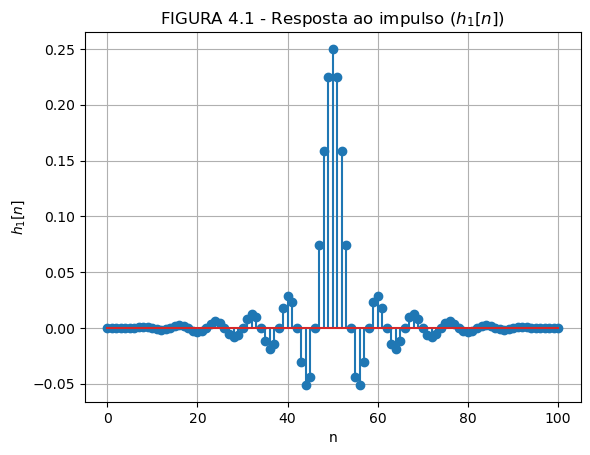

In [25]:
title(L"FIGURA 4.1 - Resposta ao impulso ($h_1[n]$)");
ylabel(L"$h_1[n]$"); xlabel("n"); grid();
stem(0:N_kaiser-1,h1);

Em seguida, criamos a variável ``h1_filtro`` do tipo ``filter``, e calculamos a resposta em frequência ``H1_filtro``:

In [26]:
h1_filtro = PolynomialRatio(h1,[1.0]);

omega_filtro_1= range(0, stop=pi, length = 5000);
H1_filtro = freqz(h1_filtro, omega_filtro_1);

Abaixo, é apresentada a **resposta em frequência** (módulo e fase) do filtro passa-baixas projetado:

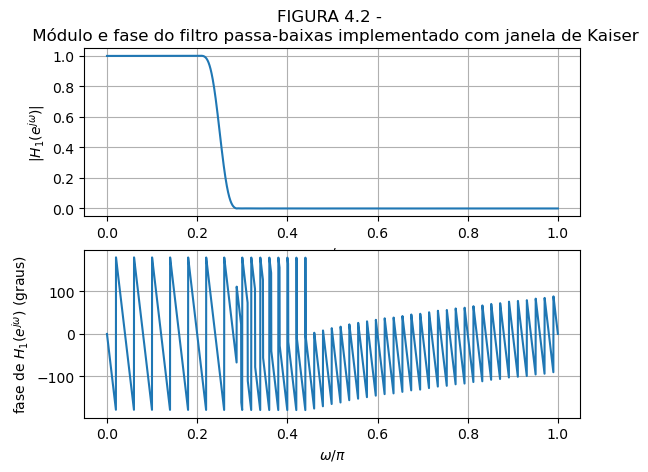

In [27]:
subplot(211)
plot(omega_filtro_1/pi,abs.(H1_filtro))
title("FIGURA 4.2 - \n Módulo e fase do filtro passa-baixas implementado com janela de Kaiser")
grid()
ylabel(L"$|H_1(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_1/pi,angle.(H1_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_1(e^{j\omega})$ (graus)");

Para verificar que o filtro implementado atende às tolerâncias definidas por $\delta_p$ e $\delta_r$, podemos apresentar uma visualização aproximada ("zoom") das regiões de interesse (banda passante e banda de rejeição):

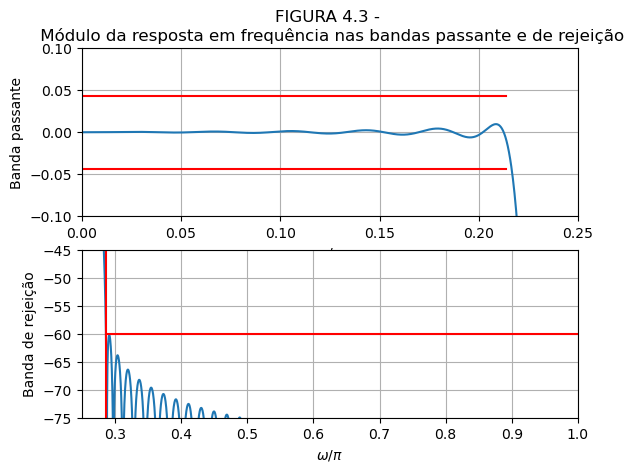

In [28]:
# Obtenção de delta_omega, a partir da fórmula que calcula o número de
# coeficientes, a partir dos parâmetros A e delta_omega
delta_omega_kaiser = (A-8)/(2.285*(N_kaiser-1))
omega_p_kaiser = omega_c - delta_omega_kaiser/2;
omega_r_kaiser = omega_c + delta_omega_kaiser/2;

subplot(211);
title("FIGURA 4.3 - \n Módulo da resposta em frequência nas bandas passante e de rejeição");
plot(omega_filtro_1/pi,20*log10.(abs.(H1_filtro)));
plot([0;omega_p_kaiser/pi],20*log10.([1-delta_p;1-delta_p]),"r");
plot([0;omega_p_kaiser/pi],20*log10.([1+delta_p;1+delta_p]),"r");

axis([0,omega_c/pi,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_1/pi,20*log10.(abs.(H1_filtro)));
plot([omega_r_kaiser;pi]/pi,20*log10.([delta_r;delta_r]),"r");
plot([omega_r_kaiser;omega_r_kaiser]/pi,[-A-15,5],"r");
axis([omega_c/pi,1,-A-15,-A+15]);
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();

### **Implementação do filtro passa-altas utilizando janela de Kaiser**


Vamos, agora, projetar o filtro **passa-altas**.

In [29]:
h2 = zeros(N_kaiser);

#h2[1:L_kaiser] = - (omega_c / pi) * sinc.((omega_c / pi) * (seq_kaiser[1:L_kaiser] .- (L_kaiser+1)));
#h2[L_kaiser + 1] = 1 - (omega_c / pi);
#h2[L_kaiser+2 : N_kaiser] = - (omega_c / pi) * sinc.((omega_c / pi) * (seq_kaiser[L_kaiser+2 : N_kaiser] .- (L_kaiser+1)));

h2 = - (omega_c / pi) * sinc.((omega_c / pi) * (seq_kaiser .- (L_kaiser+1)));
h2[L_kaiser+1] = 1 + h2[L_kaiser+1];

h2 = h2 .* janela_kaiser;

Abaixo, é plotada a resposta ao impulso do filtro passa-altas, $h_2[n]$ :

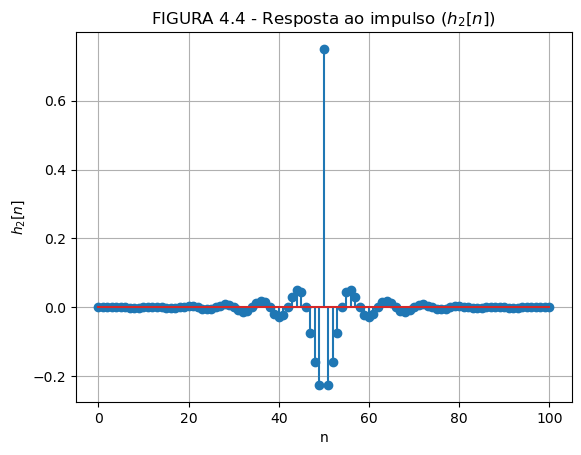

In [33]:
title(L"FIGURA 4.4 - Resposta ao impulso ($h_2[n]$)");
ylabel(L"$h_2[n]$"); xlabel("n"); grid();
stem(0:N_kaiser-1,h2);

Em seguida, criamos a variável ``h2_filtro`` do tipo ``filter``, e calculamos a resposta em frequência ``H2_filtro``:

In [34]:
h2_filtro = PolynomialRatio(h2,[1.0]);

omega_filtro_2 = range(0, stop=pi, length = 5000);
H2_filtro = freqz(h2_filtro, omega_filtro_2);

Abaixo, é apresentada a **resposta em frequência** (módulo e fase) do filtro passa-altas projetado:

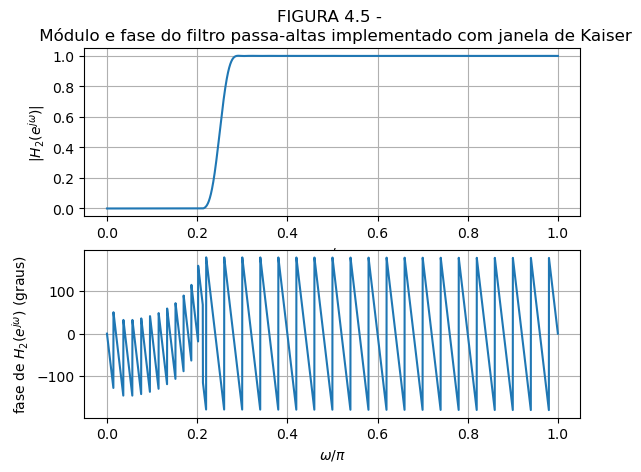

In [35]:
subplot(211)
plot(omega_filtro_2/pi,abs.(H2_filtro))
title("FIGURA 4.5 - \n Módulo e fase do filtro passa-altas implementado com janela de Kaiser")
grid()
ylabel(L"$|H_2(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_2/pi,angle.(H2_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_2(e^{j\omega})$ (graus)");

Para verificar se o filtro implementado atende às tolerâncias definidas por  $\delta_p$  e  $\delta_r$ , apresentamos abaixo uma visualização aproximada ("zoom") das regiões de interesse (banda passante e banda de rejeição).

**Observação:** Aqui, a banda passante e a banda de rejeição são delimitadas por valores de frequência $\omega$ obtidas a partir da imposição dos valores desejados de $N$, $\delta_p$, $\delta_r$ e $\omega_c$, isto é: os valores das frequências que delimitam as bandas de passagem e rejeição não foram especificadas pelo enunciado, mas sim calculadas a partir de tais parâmetros citados.

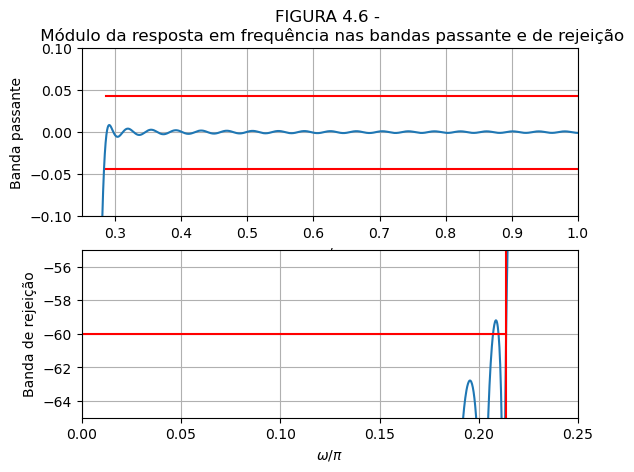

In [36]:
subplot(211);
title("FIGURA 4.6 - \n Módulo da resposta em frequência nas bandas passante e de rejeição");
plot(omega_filtro_2/pi,20*log10.(abs.(H2_filtro)));
plot([omega_r_kaiser/pi;1],20*log10.([1-delta_p;1-delta_p]),"r");
plot([omega_r_kaiser/pi;1],20*log10.([1+delta_p;1+delta_p]),"r");

axis([omega_c/pi,1,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_2/pi,20*log10.(abs.(H2_filtro)));
plot([0;omega_p_kaiser/pi],20*log10.([delta_r;delta_r]),"r");
plot([omega_p_kaiser;omega_p_kaiser]/pi,[-A-15,5],"r");

axis([0,omega_c/pi,-A-5,-A+5]);
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();

Notamos que o o módulo da resposta em frequência atende à especificação na banda passante, mas ultrapassa a tolerância na banda de rejeição. Por "tentativa e erro", notamos que, se aumentarmos o valor de $\beta$ de 5.653 para 5.75, verificaremos uma melhoria quanto ao atendimento do filtro às especificações. 

A seguir, consideramos esse novo valor de $\beta$, e plotamos os gráficos de interesse referentes ao novo filtro passa-altas obtido (resposta ao impulso, resposta em frequência, módulo da resposta em frequência nas bandas de passagem e rejeição).

In [37]:
beta_novo = 5.75;
h2_novo = zeros(N_kaiser);

h2_novo = - (omega_c / pi) * sinc.((omega_c / pi) * (seq_kaiser .- (L_kaiser+1)));
h2_novo[L_kaiser+1] = 1 + h2_novo[L_kaiser+1];

h2_novo = h2_novo .* kaiser(N_kaiser, beta_novo/pi);

h2_novo_filtro = PolynomialRatio(h2_novo,[1.0]);

omega_filtro_2 = range(0, stop=pi, length = 5000);
H2_novo_filtro = freqz(h2_novo_filtro, omega_filtro_2);

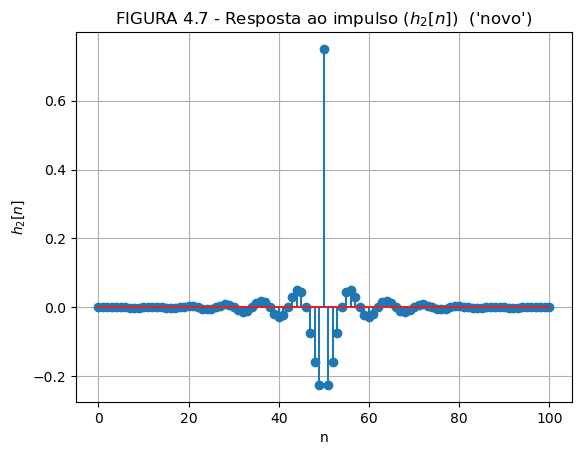

In [38]:
title(L"FIGURA 4.7 - Resposta ao impulso ($h_2[n]$)  ('novo')");
ylabel(L"$h_2[n]$"); xlabel("n"); grid();
stem(0:N_kaiser-1,h2_novo);

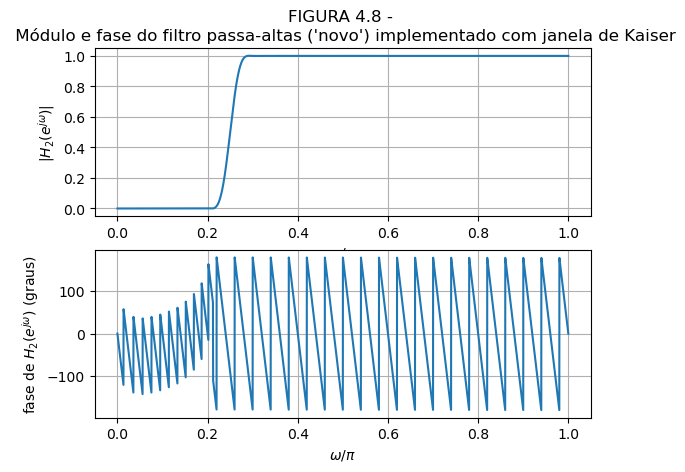

In [39]:
subplot(211)
plot(omega_filtro_2/pi,abs.(H2_novo_filtro))
title("FIGURA 4.8 - \n Módulo e fase do filtro passa-altas ('novo') implementado com janela de Kaiser")
grid()
ylabel(L"$|H_2(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_2/pi,angle.(H2_novo_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_2(e^{j\omega})$ (graus)");

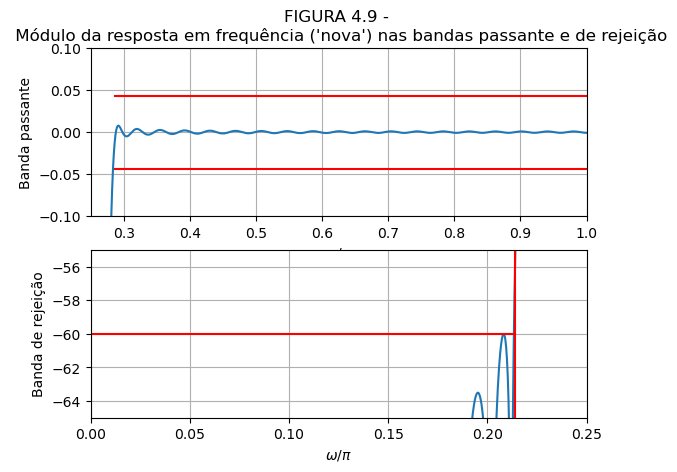

In [41]:
subplot(211);
title("FIGURA 4.9 - \n Módulo da resposta em frequência ('nova') nas bandas passante e de rejeição");
plot(omega_filtro_2/pi,20*log10.(abs.(H2_novo_filtro)));
plot([omega_r_kaiser/pi;1],20*log10.([1-delta_p;1-delta_p]),"r");
plot([omega_r_kaiser/pi;1],20*log10.([1+delta_p;1+delta_p]),"r");

axis([omega_c/pi,1,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_2/pi,20*log10.(abs.(H2_novo_filtro)));
plot([0;omega_p_kaiser/pi],20*log10.([delta_r;delta_r]),"r");
plot([omega_p_kaiser;omega_p_kaiser]/pi,[-A-15,5],"r");

axis([0,omega_c/pi,-A-5,-A+5]);
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();

## Resolução do item 5)

Neste item, propõe-se a implementação dos filtros do item anterior mediante o **método min-max** de projeto (**algoritmo de ParksMcClellan**).

Conforme a especificação apresentada pelo enunciado, temos:
$\delta_p = 0,005$ e $\delta_r = 0,001$.

O número $N$ de coeficientes dos filtros será mantido igual a 101, como no **item 1** da experiência.

A partir da imposição do número $N$ de coeficientes e das tolerâncias $\delta_p$ e $\delta_r$, podemos fazer o "caminho contrário" para determinar a diferença $\Delta\omega = \omega_r - \omega_p$, usando a fórmula

$$
N \approx 
\frac{-10\log_{10}(\delta_p \cdot \delta_r) - 13}{2,324\cdot\Delta\omega} + 1
$$

Daí, obtemos

$$
101 = \frac{-10\log_{10}(0,005 \cdot 0,001) - 13}{2,324\cdot\Delta\omega} + 1 
$$

$$
\therefore \; \Delta\omega \approx 0,172
$$

### **Implementação do filtro passa-baixas utilizando o método min-max (algoritmo de Parks-McClellan)**

Vamos implementar, inicialmente, o **filtro passa-baixas** proposto.

Fazendo $\omega_c = \pi/4$ ser a frequência intermediária entre $\omega_p$ e $\omega_r$, obtemos

$$
\omega_p = \omega_c - \Delta\omega/2 \approx 0,699
$$

e

$$
\omega_p = \omega_c + \Delta\omega/2 \approx 0,871 
$$

Para a implementação dos filtros, vamos utilizar a função ``remez`` disponibilizada pela biblioteca ``DSP`` da linguagem.

In [42]:
N_pm = N; # Número de coeficientes do filtro

delta_omega_pm = ( -10*log10(delta_p*delta_r) - 13 ) / ( 2.324 * (N_pm - 1) );

omega_p_pm = omega_c - delta_omega_pm/2;
omega_r_pm = omega_c + delta_omega_pm/2;

h1_pm = remez(N_pm, [(0, omega_p_pm/(2*pi)) => (1, 1), (omega_r_pm/(2*pi), 0.5) => (0, delta_p/delta_r)]);

Abaixo, é apresentada a resposta ao impulso $h_1[n]$ do filtro passa-baixas, projetado utilizando o método min-max.

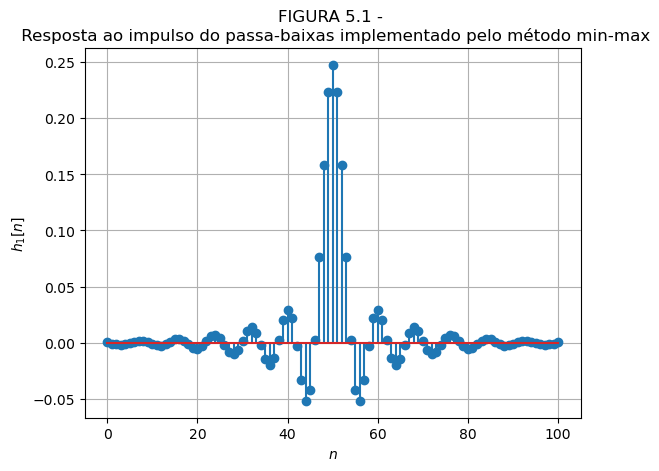

In [43]:
stem(0:N_pm-1,h1_pm); grid();
title("FIGURA 5.1 - \n Resposta ao impulso do passa-baixas implementado pelo método min-max");
ylabel(L"$h_1[n]$");
xlabel(L"$n$");

Em seguida, criamos a variável ``h1_pm_filtro`` do tipo ``filter``, e calculamos a resposta em frequência ``H1_pm_filtro``.

In [44]:
h1_pm_filtro = PolynomialRatio(h1_pm,[1.0]);

omega_filtro_1_pm= range(0, stop=pi, length = 5000);
H1_pm_filtro = freqz(h1_pm_filtro, omega_filtro_1_pm);

Abaixo, plotamos a resposta em frequência do filtro passa-baixas implementado pelo método min-max.

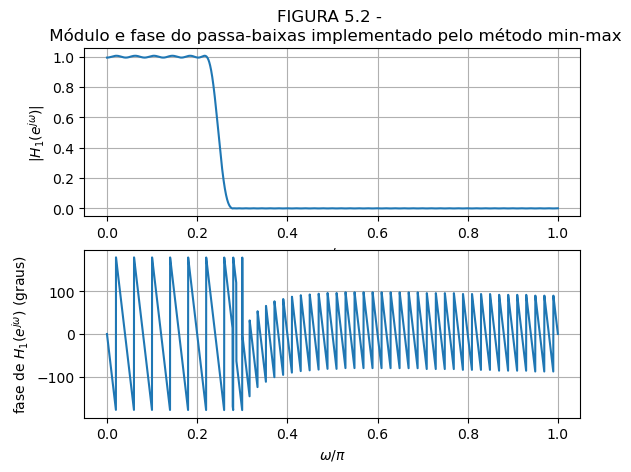

In [45]:
subplot(211)
plot(omega_filtro_1_pm/pi,abs.(H1_pm_filtro))
title("FIGURA 5.2 - \n Módulo e fase do passa-baixas implementado pelo método min-max")
grid()
ylabel(L"$|H_1(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_1_pm/pi,angle.(H1_pm_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_1(e^{j\omega})$ (graus)");

Podemos apresentar uma visualização aproximada ("zoom") das regiões de interesse (banda passante e banda de rejeição):

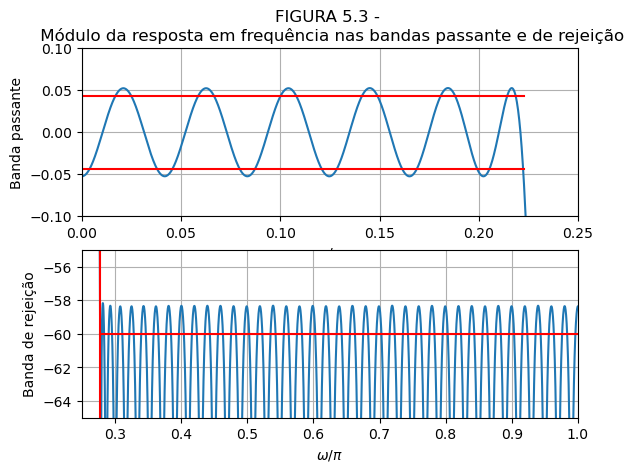

In [46]:
subplot(211);
title("FIGURA 5.3 - \n Módulo da resposta em frequência nas bandas passante e de rejeição");
plot(omega_filtro_1_pm/pi,20*log10.(abs.(H1_pm_filtro)));
plot([0;omega_p_pm/pi],20*log10.([1-delta_p;1-delta_p]),"r");
plot([0;omega_p_pm/pi],20*log10.([1+delta_p;1+delta_p]),"r");

axis([0,omega_c/pi,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_1_pm/pi,20*log10.(abs.(H1_pm_filtro)));
plot([omega_r_pm;pi]/pi,20*log10.([delta_r;delta_r]),"r");
plot([omega_r_pm;omega_r_pm]/pi,[-A-15,5],"r");
A=-20*log10(min(delta_p,delta_r));
axis([omega_c/pi,1,-A-5,-A+5]);
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();

Notamos que o filtro projetado não satisfaz os valores de tolerância estabelecidos por $\delta_p$ e $\delta_r$.

Mantendo o número de coeficientes ($N=101$), podemos alterar o valor de $\Delta\omega$. O valor calculado originalmente é $\Delta\omega = 0,172$. Após alguns testes, verificamos que, se tomarmos $\Delta\omega = 0,185$, o módulo da resposta em frequência fica dentro dos limites desejados.
Vamos, então, refazer o projeto do filtro passa-baixas pelo método min-max, mas tomando o novo valor de $\Delta\omega$.

In [47]:
delta_omega_pm = 0.185;

omega_p_pm = omega_c - delta_omega_pm/2;
omega_r_pm = omega_c + delta_omega_pm/2;

h1_pm = remez(N_pm, [(0, omega_p_pm/(2*pi)) => (1, 1), (omega_r_pm/(2*pi), 0.5) => (0, delta_p/delta_r)]);

Apresentamos a resposta ao impulso:

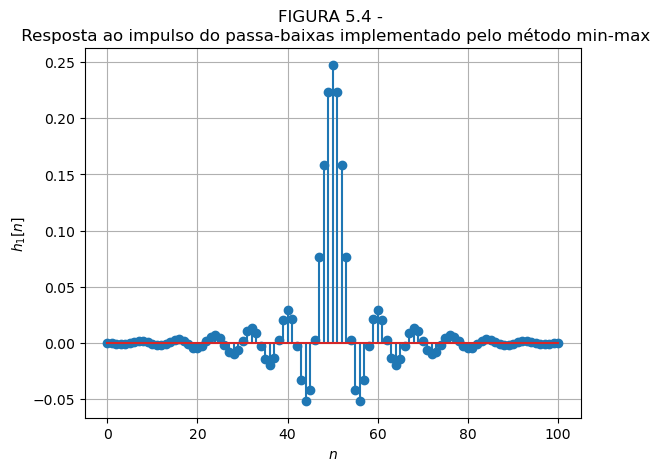

In [48]:
stem(0:N_pm-1,h1_pm); grid();
title("FIGURA 5.4 - \n Resposta ao impulso do passa-baixas implementado pelo método min-max");
ylabel(L"$h_1[n]$");
xlabel(L"$n$");

A seguir, plotamos a resposta em frequência do filtro:

In [49]:
h1_pm_filtro = PolynomialRatio(h1_pm,[1.0]);

omega_filtro_1_pm= range(0, stop=pi, length = 5000);
H1_pm_filtro = freqz(h1_pm_filtro, omega_filtro_1_pm);

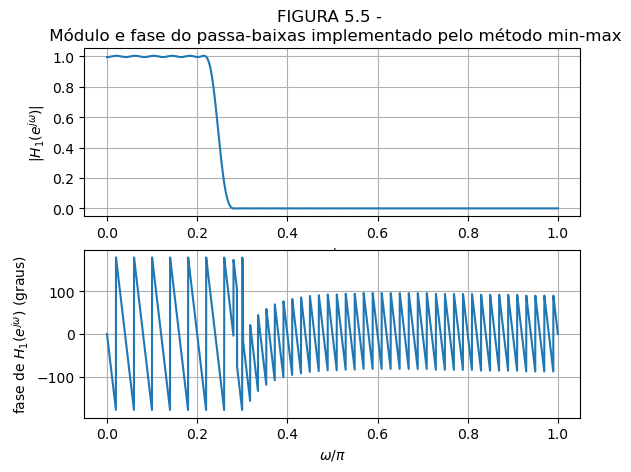

In [50]:
subplot(211)
plot(omega_filtro_1_pm/pi,abs.(H1_pm_filtro))
title("FIGURA 5.5 - \n Módulo e fase do passa-baixas implementado pelo método min-max")
grid()
ylabel(L"$|H_1(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_1_pm/pi,angle.(H1_pm_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_1(e^{j\omega})$ (graus)");

Agora, a partir de uma visualização aproximada ("zoom") das regiões de interesse (banda passante e banda de rejeição), vemos que o módulo da resposta em frequência respeita os limites definidos por $\delta_p$ e $\delta_r$:

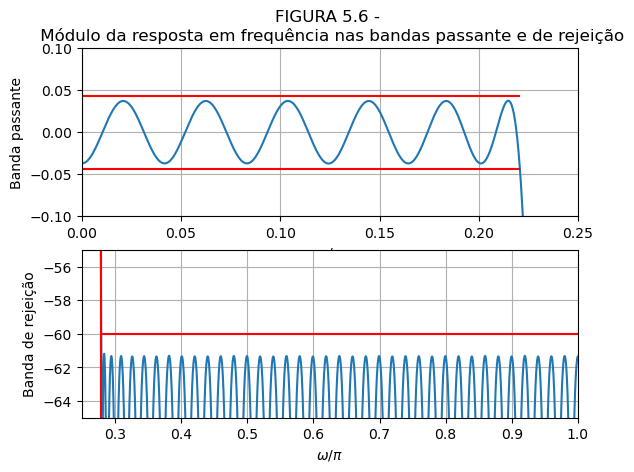

In [51]:
subplot(211);
title("FIGURA 5.6 - \n Módulo da resposta em frequência nas bandas passante e de rejeição");
plot(omega_filtro_1_pm/pi,20*log10.(abs.(H1_pm_filtro)));
plot([0;omega_p_pm/pi],20*log10.([1-delta_p;1-delta_p]),"r");
plot([0;omega_p_pm/pi],20*log10.([1+delta_p;1+delta_p]),"r");

axis([0,omega_c/pi,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_1_pm/pi,20*log10.(abs.(H1_pm_filtro)));
plot([omega_r_pm;pi]/pi,20*log10.([delta_r;delta_r]),"r");
plot([omega_r_pm;omega_r_pm]/pi,[-A-15,5],"r");
A=-20*log10(min(delta_p,delta_r))
axis([omega_c/pi,1,-A-5,-A+5])
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();

### **Implementação do filtro passa-altas utilizando o método min-max (algoritmo de ParksMcClellan)**

Vamos, agora, seguir um procedimento análogo, para implementar o **filtro passa-altas**, utilizando o método min-max. Já iremos adotar $\Delta\omega = 0,185$, como obtido anteriormente.

*(Observação para evitar possível confusão no entendimento do código: para a implementação do filtro passa-altas, não vamos atualizar as variáveis ``omega_p_pm`` e ``omega_r_pm``. No entanto, para o projeto do passa-altas, tais variáveis apresentam outro sentido: ``omega_p_pm`` agora define o limite da banda de rejeição, enquanto ``omega_r_pm`` agora define o limite da banda passante. No caso da implementação do filtro passa-baixas, essas variáveis apresentavam o significado oposto.)*

In [52]:
h2_pm = remez(N_pm, [(0, omega_p_pm/(2*pi)) => (0, delta_p/delta_r), (omega_r_pm/(2*pi), 0.5) => (1,1)]);

Apresentamos a resposta ao impulso:

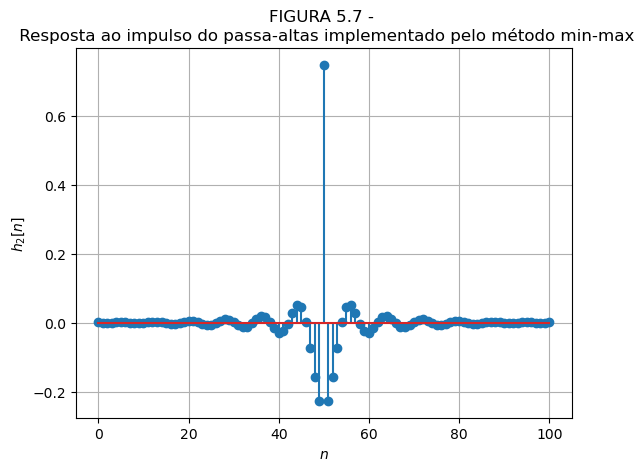

In [53]:
stem(0:N_pm-1,h2_pm); grid();
title("FIGURA 5.7 - \n Resposta ao impulso do passa-altas implementado pelo método min-max");
ylabel(L"$h_2[n]$");
xlabel(L"$n$");

A seguir, plotamos a resposta em frequência do filtro:

In [54]:
h2_pm_filtro = PolynomialRatio(h2_pm,[1.0]);

omega_filtro_2_pm= range(0, stop=pi, length = 5000);
H2_pm_filtro = freqz(h2_pm_filtro, omega_filtro_2_pm);

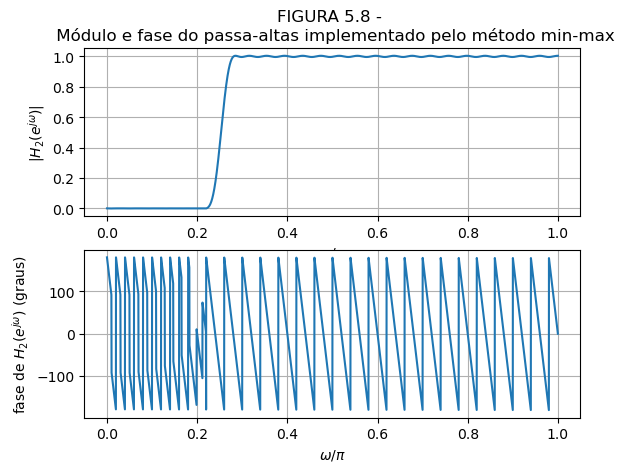

In [55]:
subplot(211)
plot(omega_filtro_2_pm/pi,abs.(H2_pm_filtro))
title("FIGURA 5.8 - \n Módulo e fase do passa-altas implementado pelo método min-max")
grid()
ylabel(L"$|H_2(e^{j\omega})|$")
xlabel(L"$\omega/\pi$");
subplot(212)
plot(omega_filtro_2_pm/pi,angle.(H2_pm_filtro)*180/pi)
grid()
xlabel(L"$\omega/\pi$");
ylabel(L"fase de $H_2(e^{j\omega})$ (graus)");

A partir de uma visualização aproximada das regiões de interesse (banda passante e banda de rejeição), vemos que o módulo da resposta em frequência respeita os limites definidos por $\delta_p$ e $\delta_r$:

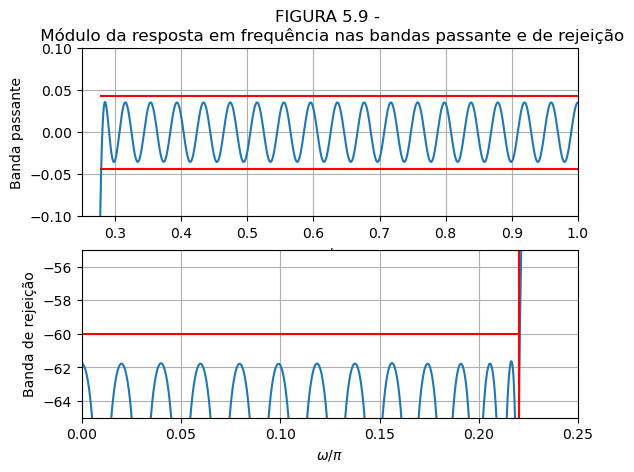

In [56]:
subplot(211);
title("FIGURA 5.9 - \n Módulo da resposta em frequência nas bandas passante e de rejeição");
plot(omega_filtro_2_pm/pi,20*log10.(abs.(H2_pm_filtro)));
plot([omega_r_pm/pi;1],20*log10.([1-delta_p;1-delta_p]),"r");
plot([omega_r_pm/pi;1],20*log10.([1+delta_p;1+delta_p]),"r");

axis([omega_c/pi,1,-0.1,0.1]);
ylabel("Banda passante"); xlabel(L"$\omega/\pi$"); grid();

subplot(212);
plot(omega_filtro_2_pm/pi,20*log10.(abs.(H2_pm_filtro)));
plot([0;omega_p_pm/pi],20*log10.([delta_r;delta_r]),"r");
plot([omega_p_pm;omega_p_pm]/pi,[-A-15,5],"r");

axis([0,omega_c/pi,-A-5,-A+5])
ylabel("Banda de rejeição"); xlabel(L"$\omega/\pi$"); grid();